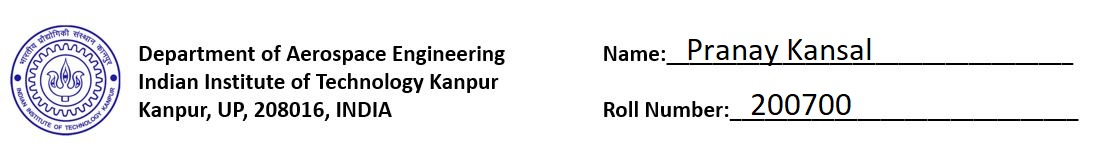

## Review Exercise on Optimization OPT01

###  Purpose of this worksheet is to experiment with Code Implementing Gradient Descent and its Variants

**Note:** *The codes used for this learning exploration are from the book Math for Deep Learning (2021) by Ronald T Knuesel (RTK) (ISBN-13:978-1-7185-0191-1, No Starch Publications, USA and accessible from https://github.com/rkneusela9.MathForDeepLearning/ and also the errata page at https://nostartch.com/math-deep-learning While you can use this for initial experiments you are encouraged to implement these in other platforms such as Tensorflow/Keras/PyTorch as per your choice.*

*The codes from the above resource and reproduced in this worksheet basically implement the plain-vanilla gradient descent (GD) and momentum accelerated GD or MAGD for funtions of a single variable (1D) and functions of 2 variables (2D).*


### Exercises with 1D Gradient Descent and Variants

##### TASK 1: 
(a) The function used in the 1D codes is $f(x)=6x^2-12x+3$\
You are expected to use different functions and watch GD and MAGD in action for your functions. If possible modify the codes to implement animation of GD and MAGD steps from initial guess to the minimum point of interest \(b) Implement the Nestrov Assisted Gradient Descent (NAGD) for the functions of your choice and compare and comment on the three approaches- GD, MAGD and NAGD. Plot the variation of the function value vs number of iterations for the optimization.


### 1D Gradient Descent, MAGD and NAGD 

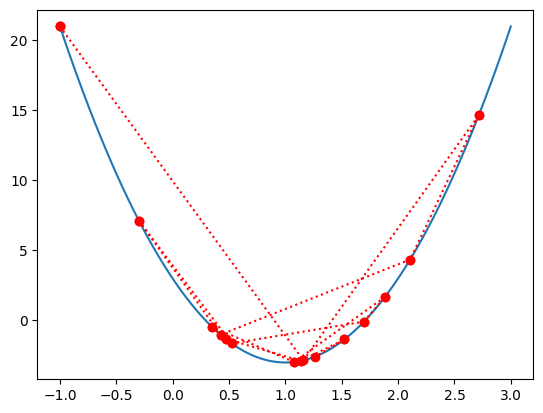

In [2]:
import sys
import os
import numpy as np
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation

#  The function and its derivative
def f(x):
    return 6*x**2 - 12*x + 3
def d(x):
    return 12*x - 12

#gradient to perform
def GD(x0,x,eta,n):
    for i in range(n):
        plt.plot([x0,x],[f(x0),f(x)],marker='o', linestyle='dotted', color='r')
        x0=x
        x=x - eta * d(x)
    plt.show()
    plt.close()
def MAGD(x0,x,v,eta,mu,n):
    for i in range(n):
        plt.plot([x0,x], [f(x0),f(x)], marker='o', linestyle='dotted', color='r')
        x0 = x
        v = mu*v - eta * d(x)
        x = x + v
    plt.show()
    plt.close()
def NAGD(x0,x,v,eta,mu,n):
    for i in range(n):
        plt.plot([x0,x], [f(x0),f(x)], marker='o', linestyle='dotted', color='r')
        x0=x
        v=mu*v - eta * d(x+mu*v)  # why not + eta
        x=x+v
    plt.show()
    plt.close()
    
#  Show the function
x = np.linspace(-1,3,1000)
y = f(x)
plt.plot(x,y,color='#1f77b4')

#parameters
x=x0=-1
eta=0.09
mu=0.8
n=15
v=0

GD_to_perform=2 #1 for GD, 2 for MAGD, 3 for NAGD

if GD_to_perform==1:
    GD(x0,x,eta,n)
elif GD_to_perform==2:
    MAGD(x0,x,v,eta,mu,n)
elif GD_to_perform==3:
    NAGD(x0,x,v,eta,mu,n)
else:
    print("please provide a valid input")
plt.show()

Performance- 
momentum restriction factor and the step size on the route to the target-

I tried to make the animation below but the error has to be corrected of not showing

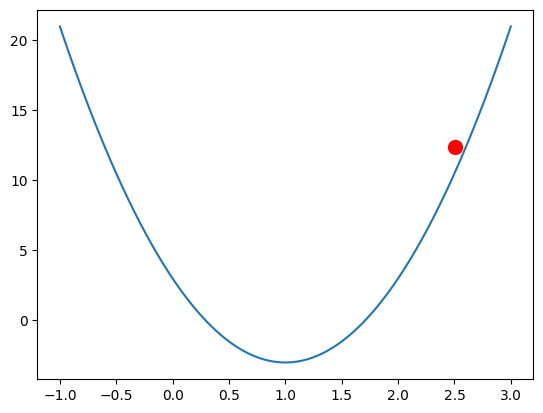

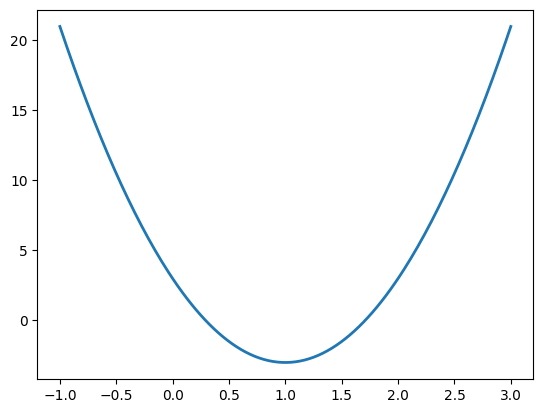

In [3]:
# You may add your code animating the steps here to show the effects of step size on the route to the target.
x = np.linspace(-1,3,1000)
y = f(x)
plt.plot(x,y,color='#1f77b4')

#-0.2*np.sin(np.arctan(d(x[600])))
x=x[900]
y=y[900]
plt.plot(x-0.1*np.sin(np.arctan(d(x))),y-0.1*np.cos(np.arctan(d(x))),marker='o',color='r',markersize=10)

fig, ax = plt.subplots()
x_data = np.linspace(-1, 3, 200)  # x values for the line
y_data = f(x_data)  # corresponding y values

line, = plt.plot(x_data, y_data, lw=2)
ball, = plt.plot([], [], marker='o',color='r', markersize=10)  # the ball object

def init():
    ball.set_data([], [])
    return ball,

def animate(frame):
    x = x_data[frame]
    y = f(x)
    ball.set_data(x, y)
    return ball,

#ani = FuncAnimation(fig, animate, frames=len(x_data), init_func=init, blit=True)

#plt.show()

#### TASK 2: 
(a) The function used in the 1D codes is  $𝑓(𝑥)=6𝑥^2+9y^2-12𝑥-14y+3$\
You are expected to use different functions and watch GD and MAGD in action for your functions. Experiment with different starting locations to assess their influence on the route to the target.If possible modify the codes to implement animation of GD and MAGD steps from initial guess to the minimum point of interest (b) Implement the Nestrov Assisted Gradient Descent (NAGD) for the functions of your choice and compare and comment on the three approaches- GD, MAGD and NAGD.Plot the variation of the function value vs number of iterations for the optimization.

## 2D Gradient Descent, MAGD and NAGD 

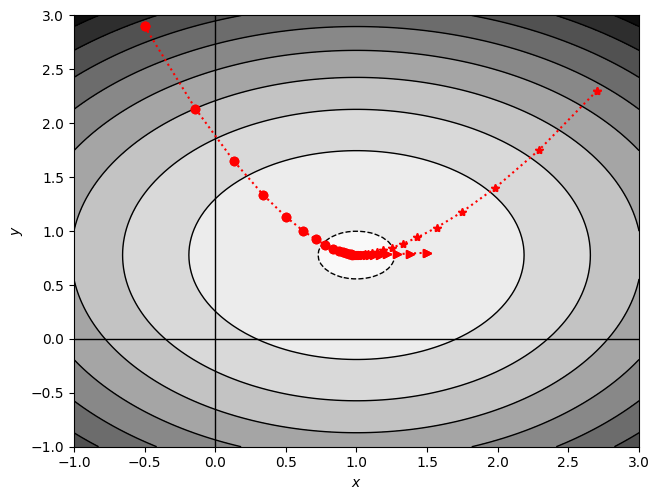

In [4]:
# Optional- Combine all the 3 methods into a single code giving user option 
def f(x,y):
    return 6*x**2 + 9*y**2 - 12*x - 14*y + 3

def dx(x,y):
    return 12*x - 12

def dy(x,y):
    return 18*y - 14

def GD(x0,x,y0,y,eta,mu,n,mark):
    Z=np.zeros((n,1))
    for i in range(n):
        plt.plot([x0,x],[y0,y],marker=mark, linestyle='dotted', color='r')
        x0=x
        y0=y
        Z[i]=f(x,y)
        x=x - eta * dx(x,y)
        y=y - eta * dy(x,y)
    return x,y,Z
    
def MAGD(x0,x,y0,y,eta,mu,n,mark):
    vx=0
    vy=0
    Z=np.zeros((n,1))
    for i in range(n):
        plt.plot([x0,x], [y0,y], marker=mark, linestyle='dotted', color='r')
        x0 = x
        y0=y
        Z[i]=f(x,y)
        vx = mu*vx - eta * dx(x,y)
        x = x + vx
        vy = mu*vy - eta * dy(x,y)
        y = y + vy
    return x,y,Z
def NAGD(x0,x,y0,y,eta,mu,n,mark):
    vx=0
    vy=0
    Z=np.zeros((n,1))
    for i in range(n):
        plt.plot([x0,x], [y0,y], marker=mark, linestyle='dotted', color='r')
        Z[i]=f(x,y)
        x0=x
        vx = mu*vx - eta * dx(x+mu*vx,y)  # why not + eta
        x=x+vx
        y0=y
        vy = mu*vy - eta * dy(x,y+mu*vy)
        y = y + vy
    return x,y,Z
#  Gradient descent steps
N = 100
x,y = np.meshgrid(np.linspace(-1,3,N), np.linspace(-1,3,N))
z = f(x,y)
plt.contourf(x,y,z,10, cmap="Greys")
plt.contour(x,y,z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.7777778,color='k',marker='+')

#parameters
eta=0.02
mu=0.8
n=15
v=0


GD_to_perform=1 #1 for GD, 2 for MAGD, 3 for NAGD

if GD_to_perform==1:
    x=x0=-0.5
    y=y0=2.9
    GD(x0,x,y0,y,eta,mu,n,'o')
    
    x=x0=1.5
    y=y0=0.8
    GD(x0,x,y0,y,eta,mu,n,'>')
    
    x=x0=2.7
    y=y0=2.3
    GD(x0,x,y0,y,eta,mu,n,'*')
    
elif GD_to_perform==2:
    x=x0=0.5
    y=y0=2.9
    MAGD(x0,x,y0,y,eta,mu,n,'o')
    
    x=x0=1.5
    y=y0=0.8
    MAGD(x0,x,y0,y,eta,mu,n,'>')
    
    x=x0=2.7
    y=y0=2.3
    MAGD(x0,x,y0,y,eta,mu,n,'*')
    
elif GD_to_perform==3:
    x=x0=0.5
    y=y0=2.9
    NAGD(x0,x,y0,y,eta,mu,n,'o')
    
    x=x0=1.5
    y=y0=0.8
    NAGD(x0,x,y0,y,eta,mu,n,'>')
    
    x=x0=2.7
    y=y0=2.3
    NAGD(x0,x,y0,y,eta,mu,n,'*')
    
else:
    print("please provide a valid input")


plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_2d_steps.png", dpi=300)
plt.show()
plt.close()

### 2D Momentum Assisted Gradient Descent 

#### TASK 3
The function used in this 2D MAGD code and in SD and NAGD code is a composed of two inverted Gaussians. You could create your own functions using the tool https://c3d.libretexts.org/CalcPlot3D/index.html and experiment with the code and assess the results via your comments. (a) Use all these codes to assess the effects of different starting locations and the parameters restricting the momentum and memory of previous time steps for both MAGD and NAGD on the approach to the target for your functions of choice and also plot the variation of the function value vs number of iterations for the optimization. (b) If possible animate the route to the target by comparing all three methods.

(x,y) =  -1.4091050925413544 0.09521909486151284
(x,y) =  2.020776965695743 1.0092761621923263


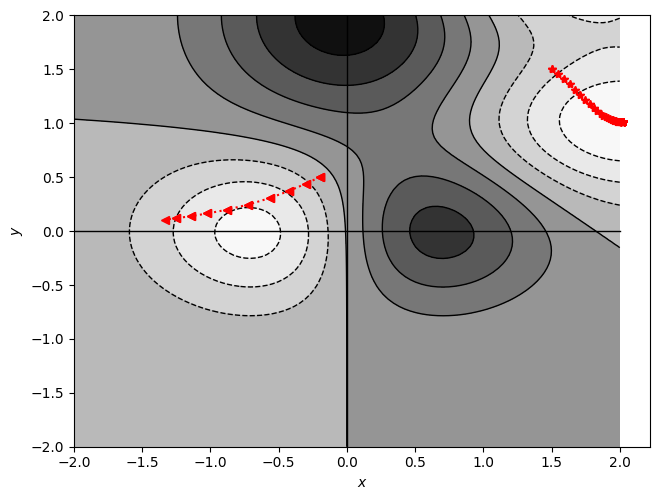

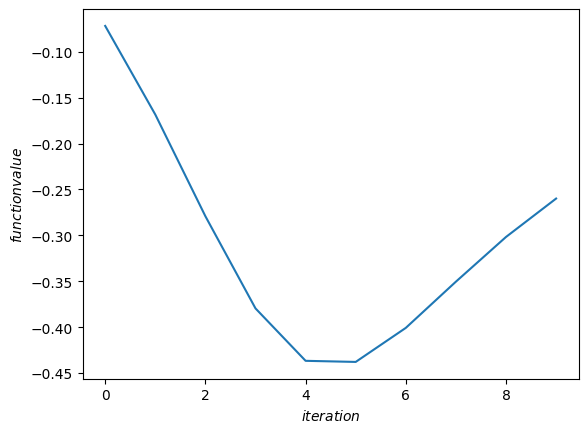

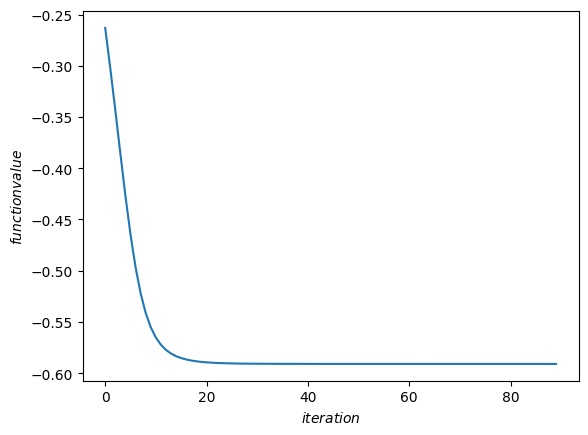

In [5]:
#
#  file:  gd_momentum.py
#
#  2D example of gradient descent for a function
#  with more than one minimum with momentum
#
#  RTK, 14-Feb-2021
#  Last update:  21-Feb-2021
#
################################################################

import numpy as np
import matplotlib.pylab as plt

#  Function and partial derivatives
def f(x,y):
    return 1.2*x*np.exp(-x**2-2*y**2)+0.7*np.exp(-(x)**2-(y-2)**2)-0.6*np.exp(-(x-2)**2-2*(y-1)**2)-0.45*np.exp(-(x-1.6)**2-3*(y-2.4)**2)

def dx(x,y):
    return (1.2-2.4*x)*np.exp(-x**2-2*y**2)-1.4*x*np.exp(-(x)**2-(y-2)**2)+(1.2*x-2.4)*np.exp(-(x-2)**2-2*(y-1)**2)+(0.9*x-1.44)*np.exp(-(x-1.6)**2-3*(y-2.4)**2)

def dy(x,y):
    return -4.8*x*y*np.exp(-x**2-2*y**2)-1.4*(y-2)*np.exp(-(x)**2-(y-2)**2)+2.7*(y-2.4)*np.exp(-(x-1.6)**2-3*(y-2.4)**2)+2.4*(y-1)*np.exp(-(x-2)**2-2*(y-1)**2)

#  Gradient descent steps
N = 100
x,y = np.meshgrid(np.linspace(-2,2,N), np.linspace(-2,2,N))
z = f(x,y)
plt.contourf(x,y,z,10, cmap="Greys")
plt.contour(x,y,z,10, colors='k', linewidths=1)
plt.plot([0,0],[-2,2],color='k',linewidth=1)
plt.plot([-2,2],[0,0],color='k',linewidth=1)


#gd(-1.5, 1.2,20, 'o')
#gd( 1.5,-1.8,40, 's')
#gd( 0.0, 0.0,30, '<')
[x,y,Z1]=GD( -0.2,-0.2,0.5,0.5, 0.1,  0.6, 10, '<')    #can perform MAGD and NAGD 
print("(x,y) = " ,x,y )
[x,y,Z2]=GD( 1.5,1.5,1.5, 1.5, 0.1, 0.6, 90, '*')      #can perform MAGD and NAGD
print("(x,y) = ", x,y )

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_momentum_steps.png", dpi=300)
plt.show()
plt.close()

plt.plot(range(len(Z1)),Z1)
plt.xlabel("$iteration$")
plt.ylabel("$function value$")
plt.show()
plt.close()

plt.plot(range(len(Z2)),Z2)
plt.xlabel("$iteration$")
plt.ylabel("$function value$")
plt.show()
plt.close()

#### TASK 4

For all the functions used in your exercises implement the variants of the adaptive gradient descent methods (a) RMSProp (b) AdaGrad and (c) ADAM by modifying the codes used in this exercise. Compare and comment on the differences between all these adaptive gradient methods with SD, MAGD and NAGD methods used in this work. As these methods are available in TensorFlow, Keras and PyTorch you are to compare the outputs from your modified codes with that from TensorFlow, Keras and PyTorch.Plot the variation of the function value vs number of iterations for the optimization.

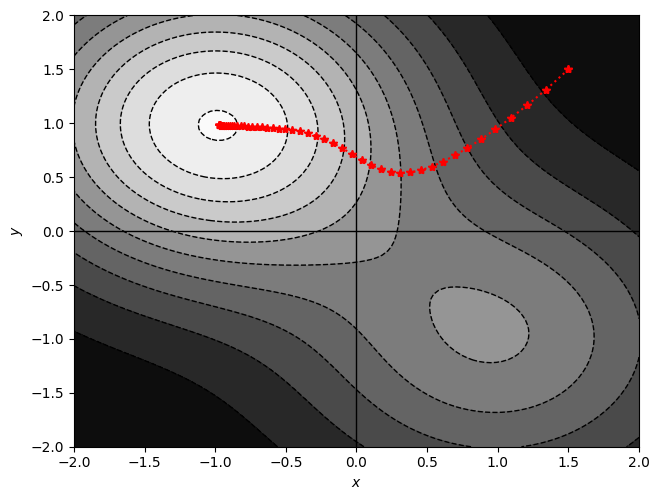

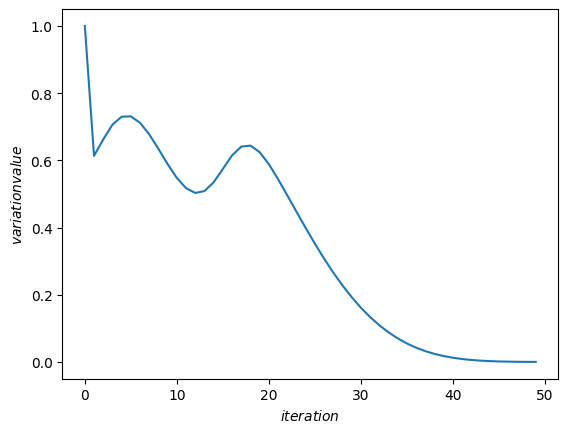

In [7]:
#  Function and partial derivatives
import tensorflow as tf

def f(x,y):
    return -2*np.exp(-0.5*((x+1)**2+(y-1)**2)) +  \
           -np.exp(-0.5*((x-1)**2+(y+1)**2))

def dx(x,y):
    return 2*(x+1)*np.exp(-0.5*((x+1)**2+(y-1)**2)) +  \
           (x-1)*np.exp(-0.5*((x-1)**2+(y+1)**2))

def dy(x,y):
    return (y+1)*np.exp(-0.5*((x-1)**2+(y+1)**2)) +  \
           2*(y-1)*np.exp(-0.5*((x+1)**2+(y-1)**2))

#  Gradient descent steps
N = 100
x,y = np.meshgrid(np.linspace(-2,2,N), np.linspace(-2,2,N))
z = f(x,y)
plt.contourf(x,y,z,10, cmap="Greys")
plt.contour(x,y,z,10, colors='k', linewidths=1)
plt.plot([0,0],[-2,2],color='k',linewidth=1)
plt.plot([-2,2],[0,0],color='k',linewidth=1)

def RMSProp(x,y,eta,mu,n,beta,mark):
    Z=np.zeros((n,1))
    Ex=0
    Ey=0
    x0=x
    y0=y
    for i in range(n):
        plt.plot([x0,x],[y0,y],marker=mark, linestyle='dotted', color='r')
        Z[i]=f(x,y)
        x0=x
        y0=y
        Ex=beta*(Ex)+(1-beta)*dx(x,y)**2
        Ey=beta*(Ey)+(1-beta)*dy(x,y)**2
        x=x - eta * dx(x,y) * (1/np.sqrt(Ex))
        y=y - eta * dy(x,y) * (1/np.sqrt(Ey))
    return x,y,Z
def AdaGrad(x,y,eta,mu,n,beta,mark):
    Z=np.zeros((n,1))
    Ex=0
    Ey=0
    x0=x
    y0=y
    for i in range(n):
        plt.plot([x0,x],[y0,y],marker=mark, linestyle='dotted', color='r')
        Z[i]=f(x,y)
        x0=x
        y0=y
        Ex=beta*(Ex)+(1-beta)*dx(x,y)**2 #e + summation of gt needs to be added instead of this
        Ey=beta*(Ey)+(1-beta)*dy(x,y)**2
        x=x - eta * dx(x,y) * (1/np.sqrt(Ex))
        y=y - eta * dy(x,y) * (1/np.sqrt(Ey))
    return x,y,Z

[x,y,Z]=RMSProp(1.5,1.5,0.05,0.9,50,0.9,'*')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_momentum_steps.png", dpi=300)
plt.show()
plt.close()

varZ=np.zeros((len(Z),1))
for i in range(len(Z)):
    if i==0:
        varZ[i]=1
    else:
        varZ[i]=(Z[i]-Z[i-1])/Z[0] 

tf.keras.optimizers.experimental.RMSprop()

plt.plot(range(len(Z)),varZ)
plt.xlabel("$iteration$")
plt.ylabel("$variation value$")
plt.show()
plt.close()